# Ciência dos Dados
## Projeto 2 - Walmart
### Integrantes do Grupo:

* Antônio Amaral Egydio Martins
* Arthur Martins de Souza Barreto

### Professor Orientador:
* Maria Kelly Venezuela

### Proposta Norteadora:

Buscamos entender como o meio interno e externo impactam diretamente na quantidade de itens vendidos no WalMart nos Estados Unidos entre 5/2/2010 até 1/11/2012. Sendo assim para este trabalho utilizaremos como Feature interna o ID da loja - que pode impactas nas vendas por existirem diferentes lojas em diferentes locais… - e como Features Externas os índices CPI (Prevailing consumer price index), Fuel Price, Unemployment e Temperature que afetam diretamente o bem estar e poder aquisitivo do consumidor - podendo aumentar ou reduzir seu consumo semanal.

### Introdução
#### `Importando bibliocas utilizadas:`

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os
import seaborn as sns
import random

#### `Importando base de dados`

In [80]:
#Checando Diretório 
print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\arthu\Desktop\Documentos\Insper\2º_Periodo\Ciencia_dos_dados\Formula1


In [81]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head(5)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

#### `Checando o  DataFrame`

**Dicionário de dados:**


Variável | Descrição
:---:|---:
Store | ID de Reconhecimento das Lojas
Weekly_Sales | Vendas Semanais
Holiday_Flag | Variavel Booleana para Feriados 
Temperature | Temperatura Exterior as lojas (Fahrenheit)
Fuel_Price | Preço do Galão de Combustivel (USD)
Prevailing consumer price index | Unidade utilizada para medir inflação
Unemployment | Taxa de Desemprego (%)


A variável *Holiday_Flag* identifica se é feriado ou não.

Valor | Significado
:---:|:---:
0 | É Feriado
1 | Não é Feriado

#### Vamos analizar as variaveis quantitativas

In [82]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

Verificando valores nulos:

In [83]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### Impressões inciais
O dataframe está ok para a analize exploratória. 

### Analise exploratória
#### Plot Gráfico Temporais
Nesta Seção será realizado o Plot de gráficos com relação ao tempo das <b>Features</b>:
* `Temperature`
* `Fuel_Price`
* `CPI`
* `Unemployment`

E da Variavel principal <b>Target</b>:
* `Weekly_Sales`

O objeto desta analise inicial é observar a progressão e variação das Features presentes no DataFrame a fim de gerar hipoteses sobre o comportamento destas variaveis.

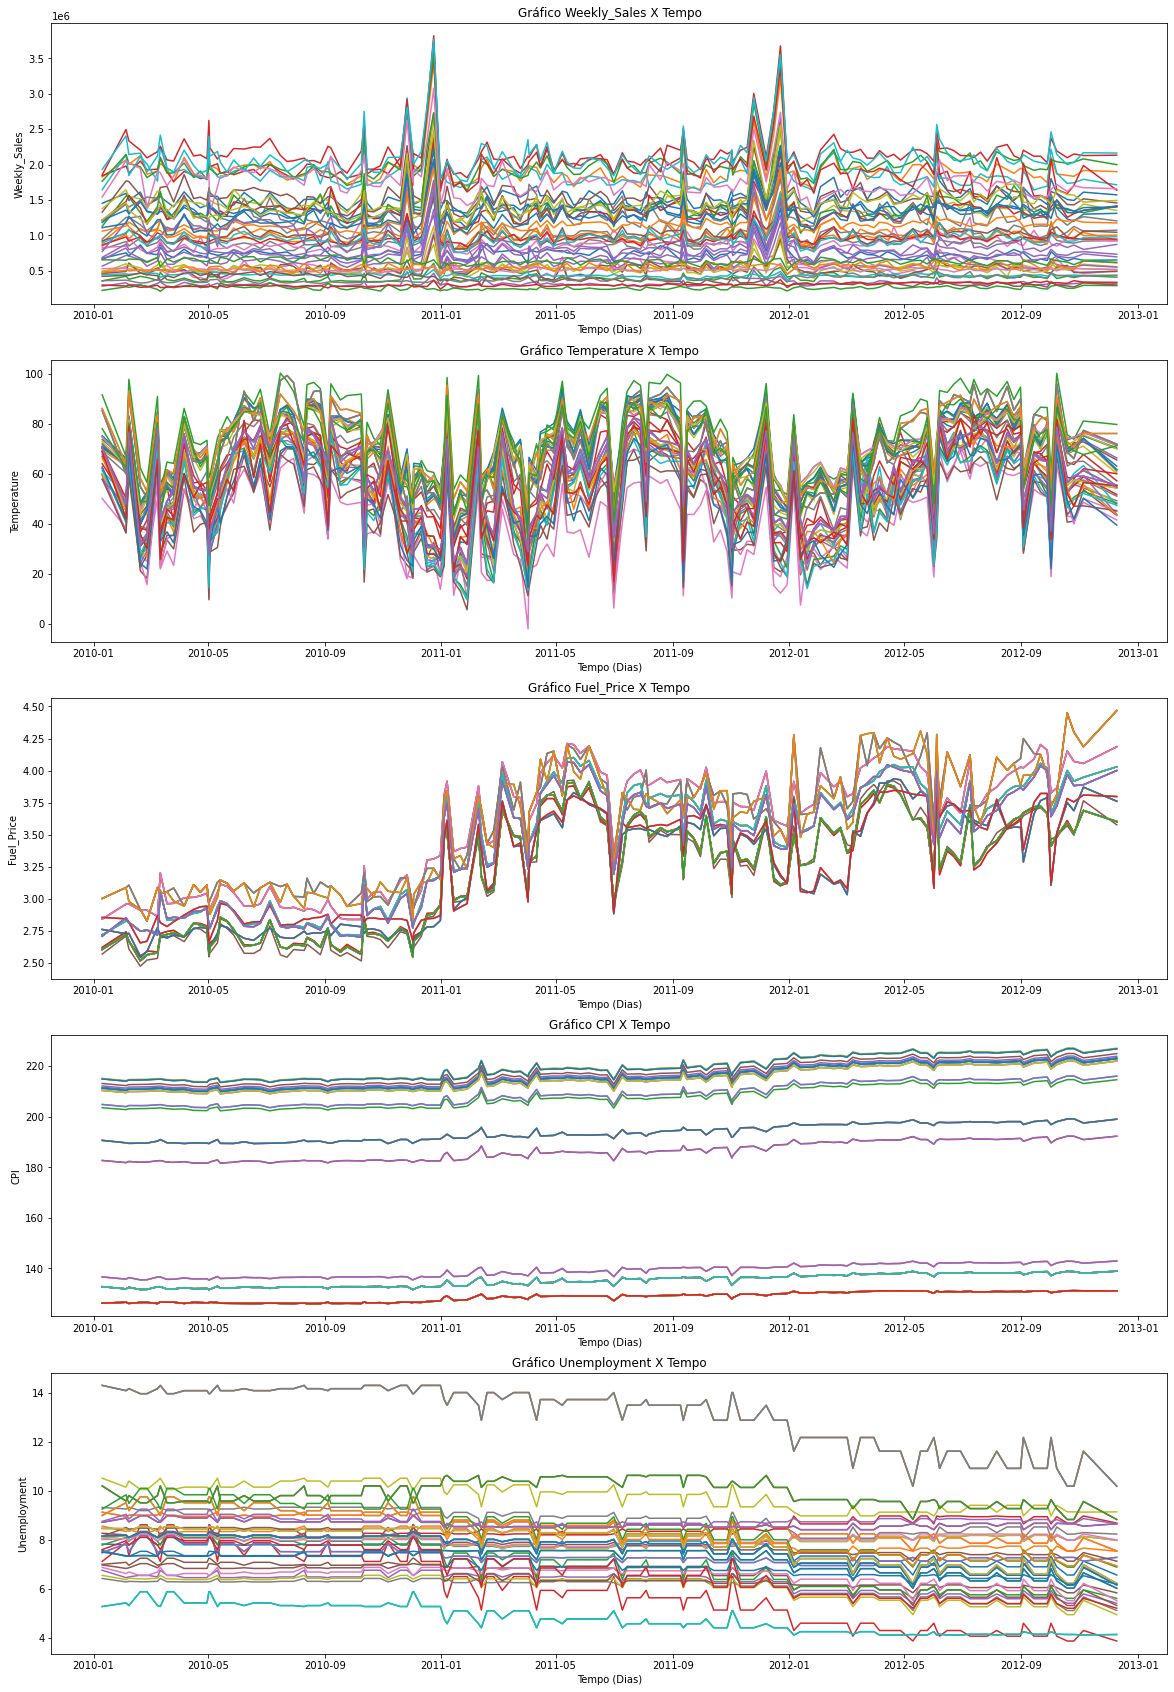

In [84]:
dft = df
df.Date = pd.to_datetime(df.Date)
df_ordenado = df.sort_values(by='Date')
l_variaveis = ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
l_subplots = [511,512,513,514,515]
plt.figure(figsize = (20,30))

index = 0
for variavel in l_variaveis:
    plt.subplot(l_subplots[index])
    for loja in range(1,46):
        dados_loja = df_ordenado.loc[df['Store'] == loja]
        plt.plot(dados_loja.Date, dados_loja[variavel])
        plt.title(f"Gráfico {variavel} X Tempo")
        plt.ylabel(variavel)
        plt.xlabel("Tempo (Dias)")
    index += 1
plt.show()

#### Plot de Gráficos Relativos à Target
Nesta Seção será realizado o Plot de gráficos da <b>Target</b> em relaçnao as <b>Features</b>:
* `Holiday_Flag`
* `Temperature`
* `Fuel_Price`
* `CPI`
* `Unemployment`

E da Variavel principal <b>Target</b>:
* `Weekly_Sales`

O objeto desta analise é observar a progressão e variação das Features presentes no DataFrame a fim de gerar correlações comportamentais destas em relação a variavel principal. 

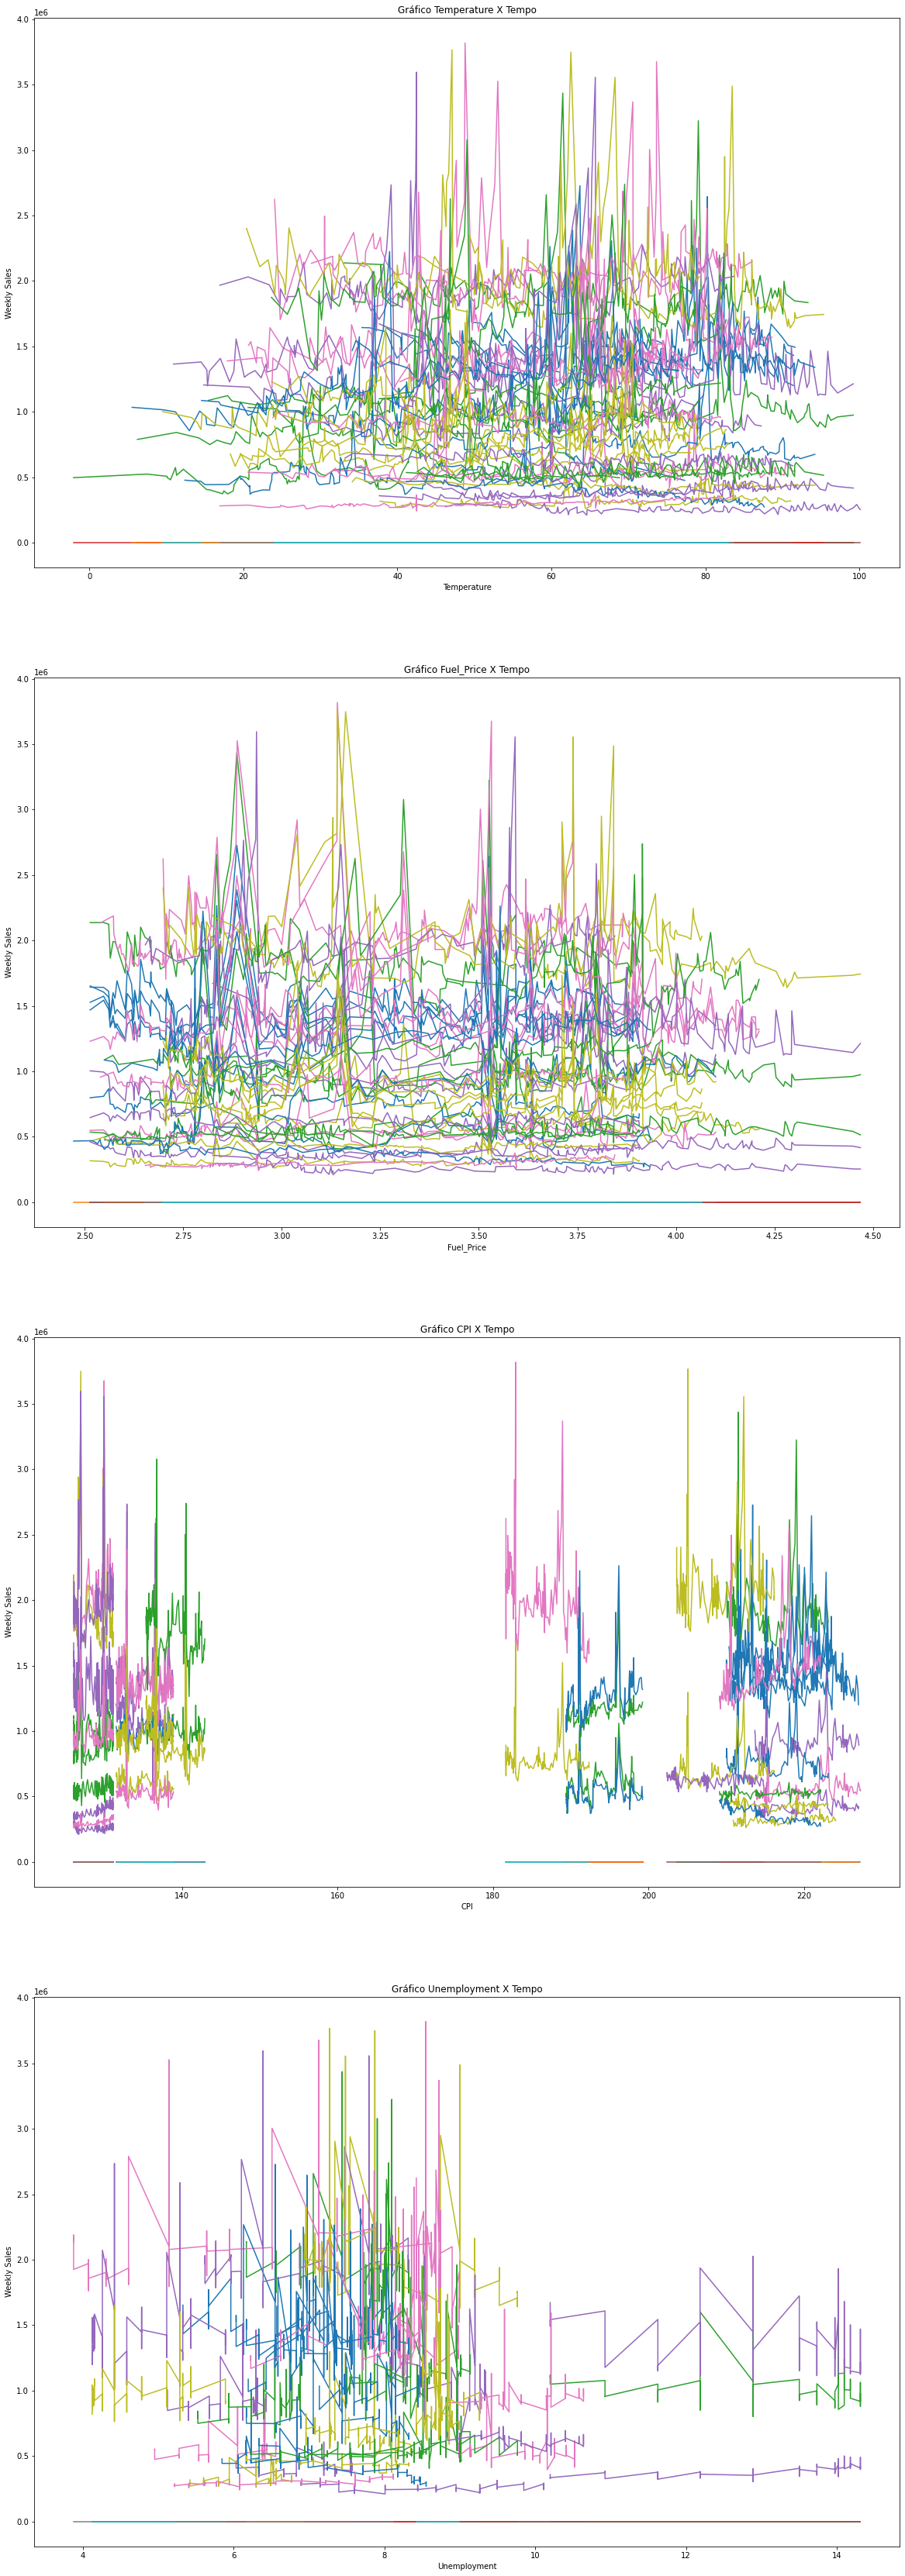

In [85]:

# vamos filtrar o dataframe, em um vetor X deixaremos as variaveis que supostamente afetam a variavel target
X_list = ["Temperature","Fuel_Price","CPI","Unemployment"]
# em Y precisamos colocar a variavel target e store, para darmos um loc por loja
Y = df[["Weekly_Sales",'Store']]

# organizando o subplot
l_subplots = [411,412,413,414]
plt.figure(figsize = (20,60))

index = 0
for variavel in X_list:
    plt.subplot(l_subplots[index])
    for loja in range(1,46):
        # variavel aux para filtrar por loja
        aux = df.loc[df['Store'] == loja]
        # filtrar a variavel x por loja e ordenar os valores para o plot
        XLinha = aux[variavel].sort_values()
        # filtrar a variavel target por loja
        YLinha = Y.loc[Y['Store'] == loja]
        # dando o plot
        plt.plot(XLinha,YLinha)
        plt.title(f"Gráfico {variavel} X Tempo")
        plt.ylabel("Weekly Sales")
        plt.xlabel(variavel)
    # mudando de variavel a ser analizada
    index += 1
plt.show()

#### Analise de Resultados

Após o Plot de gráficos Temporais e Relativos ao Target foi percebido que para ser realizado o projeto respondendo com satisfação a problematica proposta no inicio deste arquivo, entender como o meio interno e externo impactam diretamente na quantidade de itens vendidos no WalMart nos Estados Unidos, há a necessidade de agrupar os dados via datas, para assim possibilitar uma visão geral de vendas, possibilitando a analise de itens vendidos pelo Walmart - ao invés de itens vendidos por lojas independentes da rede Walmart.

### Iteração Analise Exploratoria

Nesta Iteração serão realizadas mudanças na base de dados, que agora passará a representar as vendas totais da rede Walmart, realizando a soma de todas suas lojas (semanalmente) e mantendo as metricas medianas de outras Features - como Unemployment, CPI e Temperatura que não podem ser apenas somadas, uma vez que ultrapassariam o teto máximo de porcentagem (no caso de Unemployment), ou seriam distorcidas (no caso de CPI e Temperature).

In [109]:
# precisamos agrupar as variaveis por duas maneiras
# com exceção de weekly sale, o restante é tudo por média e ela será por soma
# vamos criar dois dataframes, com cada categoria separada, dar um groupby por soma e media e depois dar o merge deles

# dataframe para unir por media
dfc = df.drop(['Store','Weekly_Sales','Holiday_Flag'],axis = 1)
dfc.groupby('Date').mean()
# dataframe para unir por soma
dfc2 = df[['Date','Weekly_Sales']]
dfc2.groupby('Date').sum()
# ja unimos por data o segundo dateframe, vamos retirar a coluna de data antes do merge para não ficar duplicada
dfc2.drop('Date', axis = 1)

# unindo os dataframes
dfc['Weekly_Sales'] = dfc2['Weekly_Sales']
dfc

# pronto, agr temos os dados agrupados por data, sendo as vendas semanais somadas e o restante dos dados
# tomados em média

Date  Temperature  Fuel_Price         CPI  Unemployment  \
0    2010-05-02        42.31       2.572  211.096358         8.106   
1    2010-12-02        38.51       2.548  211.242170         8.106   
2    2010-02-19        39.93       2.514  211.289143         8.106   
3    2010-02-26        46.63       2.561  211.319643         8.106   
4    2010-05-03        46.50       2.625  211.350143         8.106   
...         ...          ...         ...         ...           ...   
6430 2012-09-28        64.88       3.997  192.013558         8.684   
6431 2012-05-10        64.89       3.985  192.170412         8.667   
6432 2012-12-10        54.47       4.000  192.327265         8.667   
6433 2012-10-19        56.47       3.969  192.330854         8.667   
6434 2012-10-26        58.85       3.882  192.308899         8.667   

      Weekly_Sales  
0       1643690.90  
1       1641957.44  
2       1611968.17  
3       1409727.59  
4       1554806.68  
...            ...  
6430     713173.95  
6431     733455.07  
6432     734464.36  
6433     718125.53  
6434     760281.43  

[6435 rows x 6 columns]

In [110]:
dfc.describe()

Temperature   Fuel_Price          CPI  Unemployment  Weekly_Sales
count  6435.000000  6435.000000  6435.000000   6435.000000  6.435000e+03
mean     60.663782     3.358607   171.578394      7.999151  1.046965e+06
std      18.444933     0.459020    39.356712      1.875885  5.643666e+05
min      -2.060000     2.472000   126.064000      3.879000  2.099862e+05
25%      47.460000     2.933000   131.735000      6.891000  5.533501e+05
50%      62.670000     3.445000   182.616521      7.874000  9.607460e+05
75%      74.940000     3.735000   212.743293      8.622000  1.420159e+06
max     100.140000     4.468000   227.232807     14.313000  3.818686e+06

In [112]:
dfc.isnull().sum()

Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Weekly_Sales    0
dtype: int64

#### Iteração Gráfico Temporal
Nesta Seção será realizado a iteração do Plot de gráficos com relação ao tempo das <b>Features</b>:
* `Temperature`
* `Fuel_Price`
* `CPI`
* `Unemployment`

E da Variavel principal <b>Target</b>:
* `Weekly_Sales`

O objeto desta analise inicial é observar a progressão e variação das Features presentes no DataFrame a fim de gerar hipoteses sobre o comportamento destas variaveis

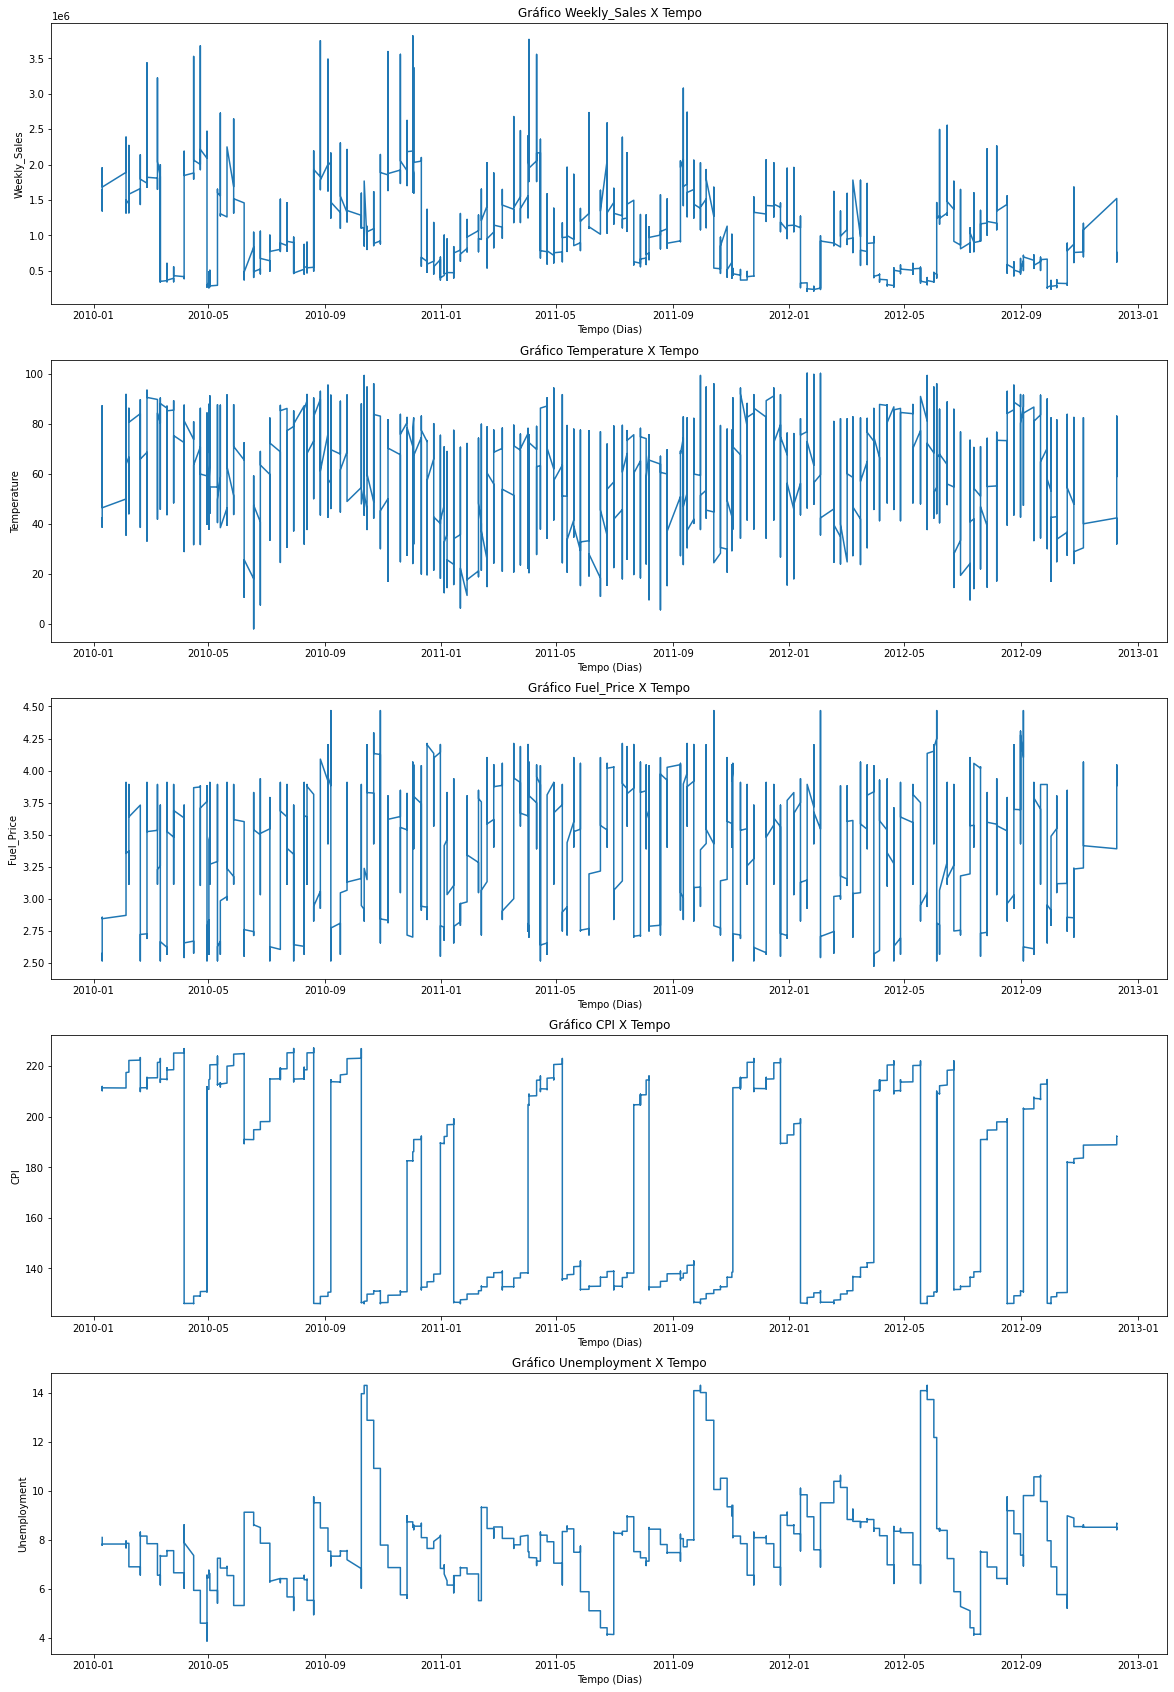

In [10]:
dfc.Date = pd.to_datetime(df.Date)
dfc_ordenado = dfc.sort_values(by='Date')
l_variaveis = ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
l_subplots = [511,512,513,514,515]
plt.figure(figsize = (20,30))

index = 0
for variavel in l_variaveis:
    plt.subplot(l_subplots[index])
    plt.plot(dfc_ordenado.Date, dfc[variavel])
    plt.title(f"Gráfico {variavel} X Tempo")
    plt.ylabel(variavel)
    plt.xlabel("Tempo (Dias)")
    index += 1
plt.show()

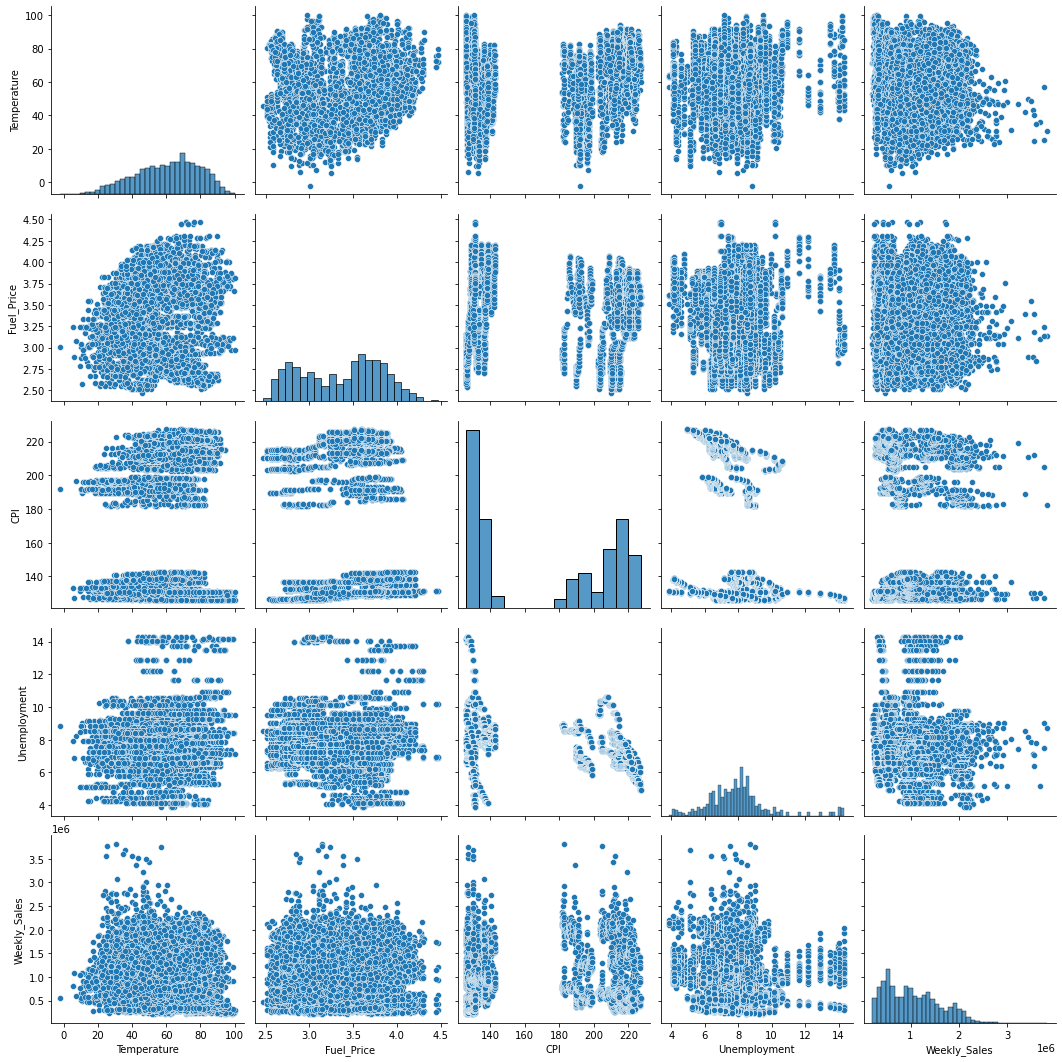

In [115]:
sns.pairplot(dfc, height=3);